<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/ProjectAkhirPDS_Annisa_Julia_Santoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEKSRIPSI TUJUAN BISNIS**
Ikan memiliki beberapa macam spesies yang berbeda-beda seperti bream, roach, whitefish, parkki, dan perch. Tentunya setiap spesies memiliki ukuran yang berbeda-beda. Oleh karena itu, tujuan bisnis ini adalah untuk memprediksi bobot atau berat ikan berdasarkan data pengukuran tubuh ikan



#**ANALISA PENDEKATAN YANG AKAN DILAKUKAN**
Pendekatan yang digunakan adalah predictive model dimana dapat memprediksi bobot atau berat ikan berdasarkan data pengukuran tubuh ikan


#**PENGUMPULAN DATA**
Pengumpulan data dilakukan dengan mengunduh dataset dari kaggle.com kemudian dataset tersebut diunggah ke github.com

#**PEMAHAMAN TERHADAP DATA YANG TELAH DIKUMPULKAN**
Dataset yang telah diunduh memiliki 159 baris dan 7 kolom. Setiap kolomnya mempunyai detail seperti dibawah ini :
1. Species : Spesies ikan
2. Weight  : Berat ikan dalam gram
3. Length1 : Panjang vertikal dalam cm
4. Length2 : Panjang diagonal dalam cm
5. Length3 : Panjang silang dalam cm
6. Height  : Tinggi dalam cm
7. Width   : Lebar diagonal dalam cm



#**PERSIAPAN DATA (EKSPLORASI DATA)**

Langkah pertama adalah mengimport library yang dibutuhkan seperti numpy, pandas, matplotlib, seaborn, linear_model dan train_test_split

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Annisajulia/ProjectPDS/main/Fish.csv')
print('Shape of dataset= ', df.shape) # Untuk mengetahui berapa baris dan kolom dalam dataset
df.head(5) # Menampilkan 5 data teratas yang ada dalam dataset

Shape of dataset=  (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace = True) # 'inplace= true' untuk mengubah dataframe
df.sample(5) # Menampilkan 5 sample secara acak

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
117,Perch,650.0,36.5,39.0,41.4,11.1366,6.0030
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
17,Bream,700.0,30.4,33.0,38.5,14.9380,5.1975
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440


Mencetak informasi secara rinci tentang dataset berupa jumlah baris & kolom, jumlah data kosong, tipe data, dan memori yang digunakan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df.isna().sum() # Untuk menampilkan jumlah nilai kosong dari setiap kolom dan tidak ada nilai null dalam dataset ini

Species        0
Weight         0
VerticalLen    0
DiagonalLen    0
CrossLen       0
Height         0
Width          0
dtype: int64

In [ ]:
df.Species.value_counts() # Untuk mengetahui jumlah dari setiap spesies

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
df_sp = df.Species.value_counts()
df_sp = pd.DataFrame(df_sp)
df_sp.T 
# Menampilkan jumlah dari setiap spesies secara vertikal

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


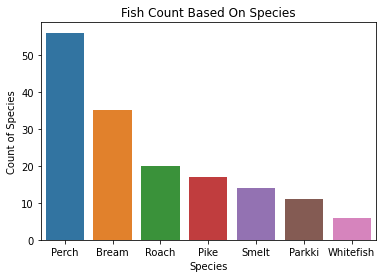

In [ ]:
sns.barplot(x= df_sp.index, y = df_sp.Species) # Menampilkan jumlah ikan berdasarkan spesies dalam bentuk barplot
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()

In [ ]:
df[df.Weight <= 0] # Mendari data dimana bobot ikan bernilai 0 atau kurang dari 0

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [ ]:
df1 = df.drop([40]) # Menghilangkan atau menghapus data ke 40
print('New dimension of dataset is= ', df1.shape) # Menampilkan jumlah kolom dan baris yang terbaru
df1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df1.corr() # Untuk mengetahui korelasi agar bisa mengetahui hubungan antar variabel

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagonalLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

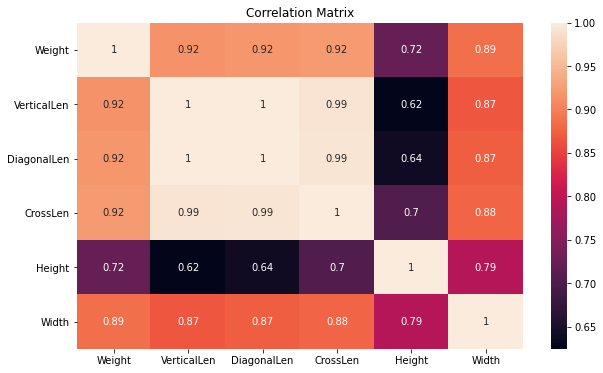

In [ ]:
plt.rcParams["figure.figsize"] = (10,6) #Menampilkan dalam bentuk correlation matrix
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

Korelasi antara verticallen, diagonallen, dan crosslen mendekati 1. Hal ini dapat menyebabkan multikolinieritas. Oleh karena itu harus menghilangkan atau menghapus 3 kolom tersebut.

In [ ]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Menghapus 3 kolom
print('New dimension of dataset is= ', df2.shape) # mengupdate jumlah kolom yang baru
df2.head()

New dimension of dataset is=  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


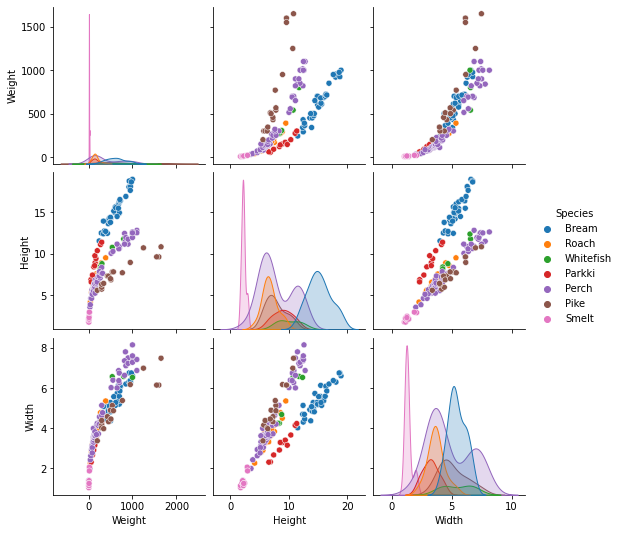

In [ ]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species') #Memvisualisasikan menggunakan pairplot

Dari boxplot dibawah diketahui bahwa ada tiga pencilan pada data 'Weight'

Text(0.5, 1.0, 'Outlier Detection based on Weight')

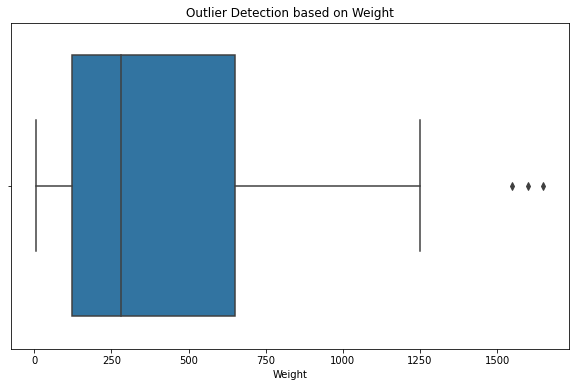

In [ ]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on Weight')

Membuat fungsi untuk menemukan outliers dari data ini

In [ ]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

Jadi berdasarkan data 'Weight', indeks 142, 143, dan 144 merupakan outlier

In [ ]:
outlier_detection(df2['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Dari boxplot dibawah dapat diketahui bahwa tidak ada outliers dalam data 'Height'

Text(0.5, 1.0, 'Outlier Detection based on Height')

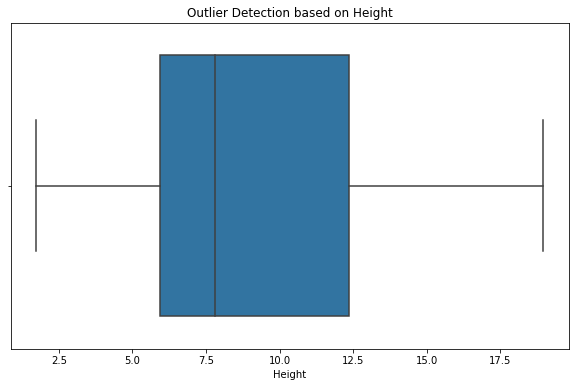

In [ ]:
sns.boxplot(x =df2['Height'])
plt.title('Outlier Detection based on Height')

Dari boxplot dibawah dapat diketahui bahwa tidak ada outliers pada data 'Width'

Text(0.5, 1.0, 'Outlier Detection based on Width')

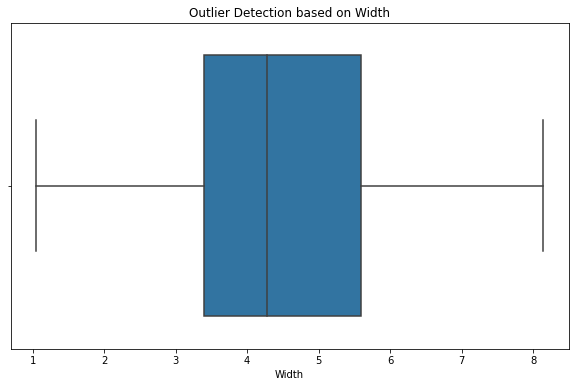

In [ ]:
sns.boxplot(x = df2['Width'])
plt.title('Outlier Detection based on Width')

In [ ]:
df3 = df2.drop([142,143,144]) # Menghilangkan indeks 142, 143, dan 144
df3.shape # Mengupdate data terbaru

(155, 4)

In [ ]:
df3.describe().T 

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


# **PEMODELAN DATA**

**Build Machine Learning Model**

In [ ]:
X = df3[['Height','Width']] # Memilih kolom menggunakan indeks kolom
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [ ]:
y = df3[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


Membagi dataset menjadi dua dimana 80% data digunakan untuk melatih model dan 20% data untuk menguji model. 

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (31, 2)
y_train dimension=  (124, 1)
y_train dimension=  (31, 1)


In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('coef= ', model.coef_) 
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [[ 10.40686081 151.73209963]]
intercept=  [-386.16761436]
score=  0.896022997657309


Memeriksa data 'Weight' dari data uji dan prediksi data 'Weight'. Dapat dilihat dari perbandingan dibawah bahwa prediksi data 'Weight' berniai negatif

In [ ]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Weight,110.000000,7.500000,955.000000,1000.0000,850.000000,55.000000,150.000000,10.000000,19.700000,200.000000,150.000000,770.000000,80.000000,70.000000,600.000000,650.000000,920.000000,130.000000,820.000000,567.00000,610.000000,500.000000,500.000000,700.000000,273.000000,430.000000,225.000000,140.000000,120.000000,130.000000,1000.000000
Predicted Weight,212.481055,-189.636049,756.728427,813.0023,816.240658,38.098095,218.321182,-168.334196,-42.610188,277.385406,243.902004,509.468844,135.296622,107.899034,621.158619,633.519982,758.408033,224.652092,858.646552,433.85797,555.485094,419.788276,514.386807,630.875714,358.001479,384.100355,254.628228,186.506555,207.382732,216.491025,896.328271


Memvisualisasikan menggunakan scatter plots

Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

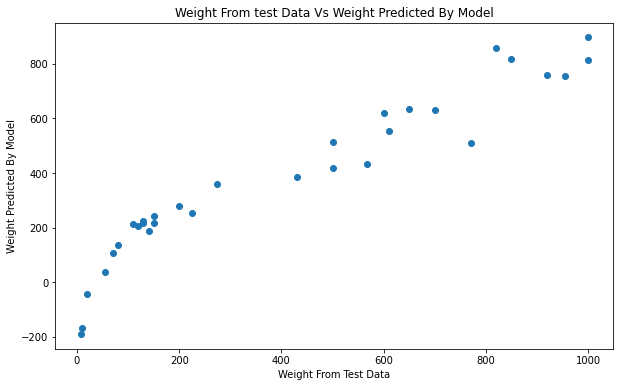

In [ ]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) 
plt.title("Weight From test Data Vs Weight Predicted By Model")

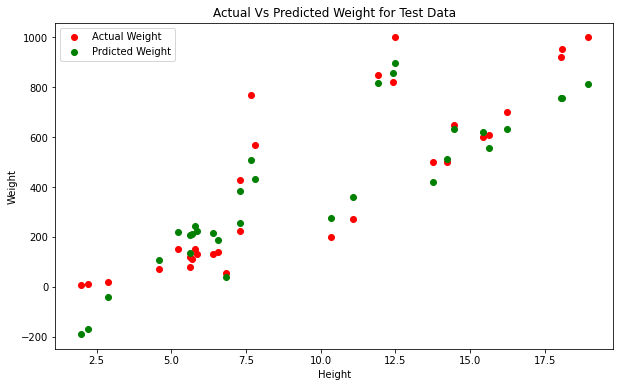

In [ ]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

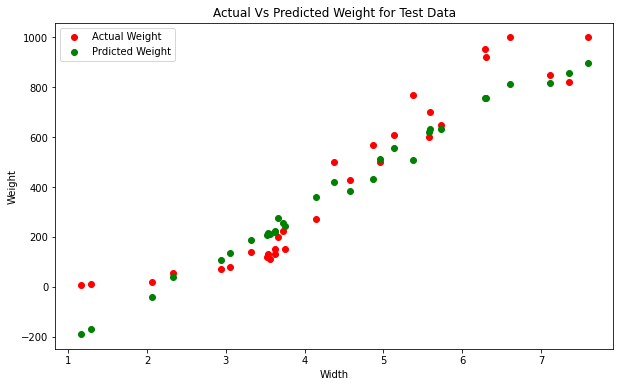

In [ ]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

# **EVALUASI MODEL**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

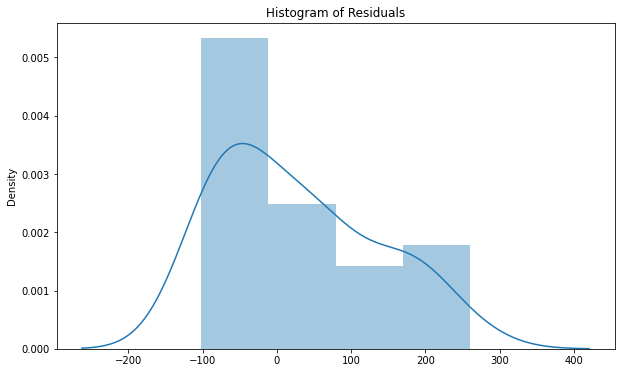

In [ ]:
sns.distplot((y_test-model.predict(X_test)))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")